# Introduction of the Project :
This is an olympics data of various different years representing the athlete informations and medals won

## Data Description 
8619 observations and 10 rows 

name - name of the athlete 

age - age of the athlete 

country - country represented by athlete 

year - year that the athlete participated in 

date_given - date of the participation 

sports- the game that the athlete participated in 

gold medal - No. of gold medals won by athlete 

silver medal - no. of silver medals won by the athlete 

bronze medal - no. of bronze medals won by the athlete 

total medals - sum of all the medals won by the athlete 



Importing all the libraries

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 

Reading the data frame and storing it in the variable df 

In [ ]:
df = pd.read_csv("/content/olympix_data_organized_with_header (1) (1).csv")

In [ ]:
df

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10-01-2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10-01-2000,Archery,0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


In [ ]:
df.describe()

,age,year,gold_medal,silver_medal,brone_medal,total_medal
count,8613.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,26.405434,2005.978881,0.364702,0.363309,0.377698,1.105709
std,5.102118,4.289946,0.545349,0.511613,0.505005,0.408892
min,15.000000,2000.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,2002.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,2006.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,2010.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,2012.000000,8.000000,3.000000,3.000000,8.000000


In [ ]:
df.isna().sum()

name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

In [ ]:
# as we can see there are a total of 5 missing values in both name and age 

In [ ]:
# for name we cannot fill  the missing values as names cannot be assigned randomly 
# but for age we will first check the skewness of that column


In [ ]:
df['age'].skew()

0.8590070668484233

In [ ]:
# as we can see age is moderately skewed, hence i am gonna go with the median to fill it              

In [ ]:
df['age'].fillna(df['age'].median(), inplace = True )

In [ ]:
df.isna().sum()

name            5
age             0
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

In [ ]:
# checking for duplicates in the dataset 

In [ ]:
duplicate = df[df.duplicated()]

In [ ]:
duplicate

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
1429,NaN,26.0,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
1430,NaN,26.0,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
4486,NaN,26.0,Argentina,2012,08-12-2012,Hockey,0,1,0,1


as we can see there are a total of 3 duplicate values and we can also see that for all the values name is also not given so we are gonna remove these 3 rows 

In [ ]:
df.drop_duplicates(keep='first', inplace = True) # removing duplicate valeues to remove bias in the study 

In [ ]:
df.duplicated().sum() # here we can see there are no duplicates left 

0

In [ ]:
# finding and removing all special characters in name column

In [ ]:
import regex as re # importing regex for creating regular expression

In [ ]:
df['name'].replace('[^A-Za-z0-9]+', '',regex = True , inplace = True) # creating an expression to only contain letters and numbers 

In [ ]:
#top 10 countries with highest number of bronze medal 

In [ ]:
total_bronze = df.groupby('country')[['brone_medal']].sum()

In [ ]:
total_bronze.sort_values('brone_medal',ascending = False).head(10)

,brone_medal
country,
United States,320
Russia,313
Germany,223
Australia,220
Italy,142
China,140
Japan,113
South Korea,105
Canada,104


In [ ]:
# top 10 countries with highest number of silver medal 

In [ ]:
total_silver = df.groupby('country')[['silver_medal']].sum()

In [ ]:
total_silver.sort_values('silver_medal',ascending = False).head(10)

,silver_medal
country,
United States,440
Australia,226
Russia,221
Germany,183
China,156
Netherlands,135
Spain,116
Japan,112
France,107


In [ ]:
# top 10 countries with highest number of gold medal 

In [ ]:
total_gold = df.groupby('country')[['gold_medal']].sum()

In [ ]:
total_gold.sort_values('gold_medal',ascending = False).head(10)

,gold_medal
country,
United States,552
Russia,234
China,234
Germany,223
Canada,168
Australia,163
Great Britain,124
South Korea,110
France,108


In [ ]:
#top 10 countries with highest number of total medals

In [ ]:
total_medals = df.groupby('country')[['total_medal']].sum()


In [ ]:
total_medals.sort_values('total_medal',ascending = False).head(10)

,total_medal
country,
United States,1312
Russia,768
Germany,629
Australia,609
China,530
Canada,370
Italy,331
Great Britain,322
France,318


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


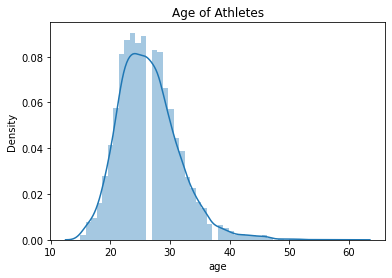

In [ ]:
plt.title('Age of Athletes')
sns.distplot(df['age'])

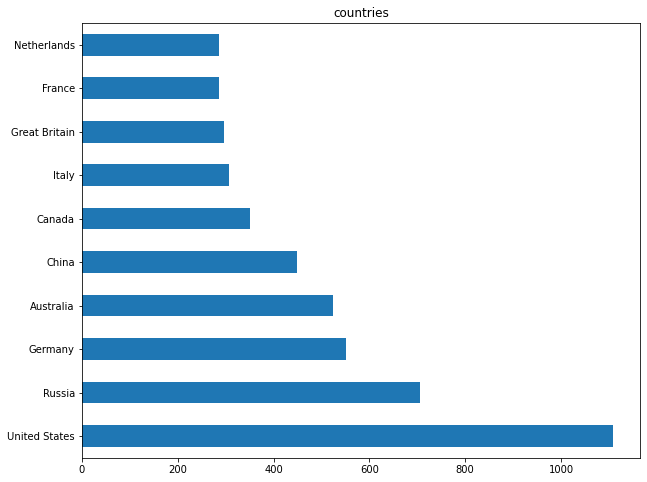

In [ ]:
plt.figure(figsize= (10,8))
plt.title('countries')
df['country'].value_counts()[:10].plot(kind='barh') # plotting top 10 Country based on number of participants


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


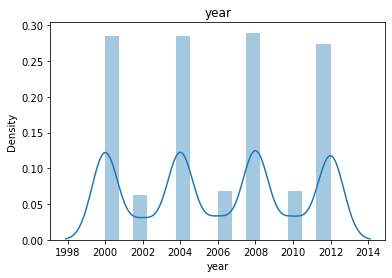

In [ ]:
plt.title('year')
sns.distplot(df['year'])

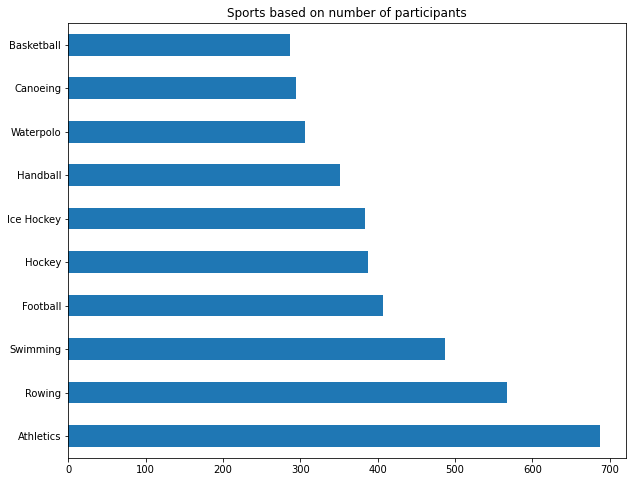

In [ ]:
plt.figure(figsize= (10,8))
plt.title('Sports based on number of participants')
df['sports'].value_counts()[:10].plot(kind='barh') # plotting top 10 sports based on number of participants

In [ ]:
df['age'].skew()

0.8591601167892493

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


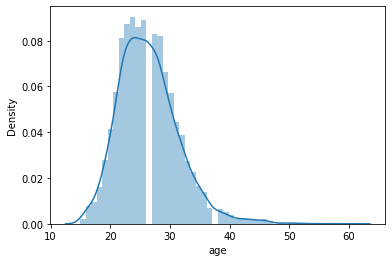

In [ ]:
sns.distplot(df['age']) 

we can see above that age data is positively skewed so we are gonna use log transformation in order to get the data more normally distributed 

In [ ]:
df['age'] = np.log(df['age']) # performing log transformation 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


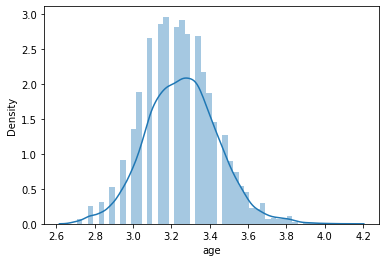

In [ ]:
sns.distplot(df['age']) # we can see the data is more bell shaped and more normlly distributed

In [ ]:
df.skew() # checking the skewness of the data 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age             0.154851
year           -0.001464
gold_medal      1.639170
silver_medal    0.954215
brone_medal     0.762454
total_medal     5.581633
dtype: float64

for Skewed data i am using median as it is more reliable for skewed data

for a more normally Distributed data i am using mean as the numerical measure 

In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age                3.258097
year            2006.000000
gold_medal         0.000000
silver_medal       0.000000
brone_medal        0.000000
total_medal        1.000000
dtype: float64

1. gold_medal - Highly Skewed - Median - 0

2. Silver_medal- Moderately skewed - Median - 0

3. Brone_Medal - Moderately Skewed - Median - 0

4. Total_medal - Highly Skewed - Median - 1



In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age                3.255700
year            2005.976785
gold_medal         0.364829
silver_medal       0.363088
brone_medal        0.377829
total_medal        1.105746
dtype: float64

1. Age - Normally Distributed - Mean - 3.255700
2. Year - Normally Distributed - Mean - 2006
